In [9]:
import pandas as pd
import numpy as np

In [10]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
sub_df=pd.read_csv("sample_submission.csv")



In [11]:
train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [12]:
train_df['stroke'].unique()

array([0, 1])

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [14]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15304.0,7651.500000,4418.028595,0.00,3825.75,7651.50,11477.25,15303.0
age,15304.0,41.417708,21.444673,0.08,26.00,43.00,57.00,82.0
hypertension,15304.0,0.049726,0.217384,0.00,0.00,0.00,0.00,1.0
heart_disease,15304.0,0.023327,0.150946,0.00,0.00,0.00,0.00,1.0
avg_glucose_level,15304.0,89.039853,25.476102,55.22,74.90,85.12,96.98,267.6
bmi,15304.0,28.112721,6.722315,10.30,23.50,27.60,32.00,80.1
stroke,15304.0,0.041296,0.198981,0.00,0.00,0.00,0.00,1.0


In [15]:
train_df.nunique()

id                   15304
gender                   3
age                    106
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level     3740
bmi                    407
smoking_status           4
stroke                   2
dtype: int64

In [16]:
train_df.duplicated().sum()

np.int64(0)

In [17]:
#Data Cleaning
sorted(train_df['age'].unique().tolist())[0:12]

[0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.68, 0.72, 0.8, 0.88]

In [18]:
train_df['age']=np.ceil(train_df['age'])
test_df['age']=np.ceil(test_df['age'])

In [19]:
train_df['gender'].value_counts()

gender
Female    9446
Male      5857
Other        1
Name: count, dtype: int64

In [20]:
train_df.drop(train_df[train_df['gender']=='Other'].index,inplace=True)
test_df.drop(test_df[test_df['gender']=='Other'].index,inplace=True)

In [21]:
#Exploratory Data Analysis(EDA)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

In [22]:
#Filter data for stroke and non stroke
no_stroke_data=train_df[train_df['stroke']==0]
stroke_data=train_df[train_df['stroke']==1]

In [23]:
#Univariate Analysis
stroke_count=train_df['stroke'].value_counts()


In [24]:
stroke_count

stroke
0    14671
1      632
Name: count, dtype: int64

In [25]:
fig=px.pie(
    stroke_count,values=stroke_count.values,names=["No","Yes"],
    title='Proportion of Stroke Cases',
    
)
fig.update_layout(legend_title_text='Stroke Status',title_x=0.3,title_y=0.95)
fig.show()

In [26]:
#Bivariate Analysis
def custom_histogram(columns:str,titles:list)->go.Figure:
    fig=sp.make_subplots(rows=1,cols=2,subplot_titles=['No Stroke','Yes Stroke'])
    histogram_no_stroke=px.histogram(no_stroke_data,x=columns,color_discrete_sequence=['#008080'])
    histogram_stroke=px.histogram(stroke_data,x=columns,color_discrete_sequence=['#008080'])
    fig.add_trace(histogram_no_stroke['data'][0],row=1,col=1)
    fig.add_trace(histogram_stroke['data'][0],row=1,col=2)
    fig.update_layout(title=titles[0],title_x=0.5)
    fig.update_xaxes(title_text=titles[1])
    fig.update_yaxes(title_text='Count')
    return fig


In [27]:
fig=custom_histogram('avg_glucose_level',['Average Glucose Level Distribution by Stroke','Average Glucose Level'])
fig.show()

In [28]:
fig=custom_histogram('age',['Age Distribution by Stroke','Age'])
fig.show()

In [29]:
stroke_data['bmi'].mean(0)

np.float64(30.230696202531643)

In [30]:
no_stroke_data['bmi'].mean()

np.float64(28.02217163110899)

In [31]:
fig=px.violin(train_df,y='bmi',x='stroke',box=True,width=700,height=500,title='BMI& Stroke Status',labels={'stroke':'Stroke Status','bmi':'BMI'})
fig.update_layout(title_x=0.3,title_y=0.9)
fig.show()

In [32]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

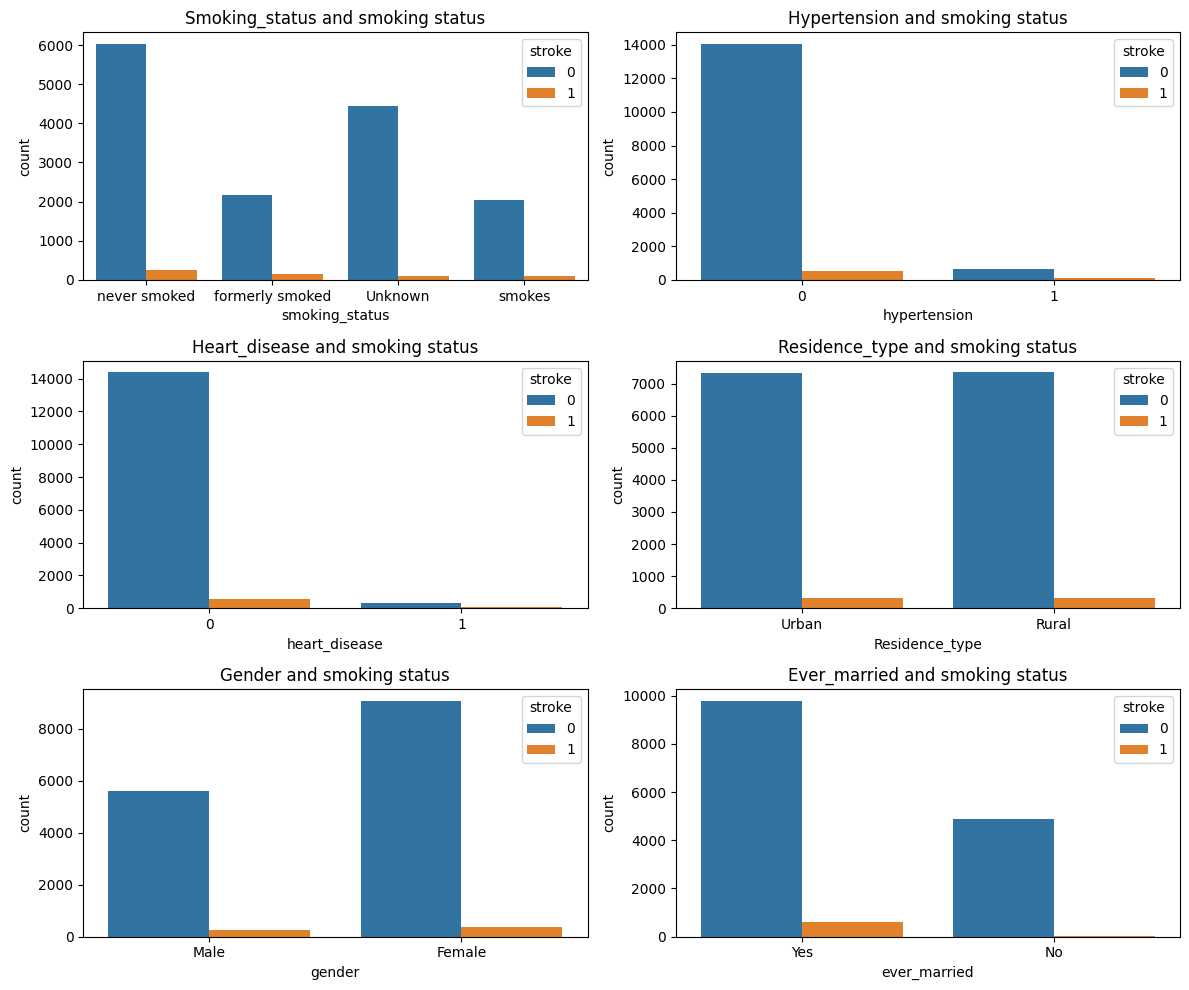

In [33]:
x_values=['smoking_status','hypertension','heart_disease','Residence_type','gender','ever_married']
fig,axis=plt.subplots(nrows=3,ncols=2,figsize=(12,10))
for ax,x_value in zip(axis.flat,x_values):
    sns.countplot(data=train_df,x=x_value,hue='stroke',ax=ax)
    ax.set_title(f'{x_value.capitalize()} and smoking status')
plt.tight_layout()
plt.show()

In [34]:
#Data Preparation & Preprcessing
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(display='diagram')



In [35]:
input_cols=list(train_df.columns)[1:-1]

In [36]:
target_col='stroke'

In [37]:
input_cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [38]:
train_inputs=train_df[input_cols].copy()
train_target=train_df[target_col].copy()
test_inputs=test_df[input_cols].copy()

In [39]:
numerical_cols=train_inputs.select_dtypes(include=np.number).columns.to_list()

In [40]:
numerical_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [41]:
categorical_cols=train_inputs.select_dtypes(include='object').columns.to_list()

In [42]:
categorical_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [43]:
categorical_cols.remove('smoking_status')

In [44]:
train_df.nunique()

id                   15303
gender                   2
age                     82
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level     3740
bmi                    407
smoking_status           4
stroke                   2
dtype: int64

In [45]:
train_df['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
      dtype=object)

In [51]:
ordinal_enc=OrdinalEncoder(categories=[['Unknown','never smoked','formerly smoked','smokes']])

In [52]:
onehot_enc=OneHotEncoder(handle_unknown='ignore')

In [53]:
preprocessor=ColumnTransformer([
    ('Ordinal_Encode',ordinal_enc,['smoking_status']),
    ('OneHot_Encode',onehot_enc,categorical_cols)
])

In [54]:
preprocessor.fit(train_inputs)

,transformers,"[('Ordinal_Encode', ...), ('OneHot_Encode', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,"[['Unknown', 'never smoked', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'


In [55]:
encoded_cols=list(preprocessor.get_feature_names_out())

In [56]:
encoded_cols

['Ordinal_Encode__smoking_status',
 'OneHot_Encode__gender_Female',
 'OneHot_Encode__gender_Male',
 'OneHot_Encode__ever_married_No',
 'OneHot_Encode__ever_married_Yes',
 'OneHot_Encode__work_type_Govt_job',
 'OneHot_Encode__work_type_Never_worked',
 'OneHot_Encode__work_type_Private',
 'OneHot_Encode__work_type_Self-employed',
 'OneHot_Encode__work_type_children',
 'OneHot_Encode__Residence_type_Rural',
 'OneHot_Encode__Residence_type_Urban']

In [60]:
train_inputs[encoded_cols]=preprocessor.transform(train_inputs)
test_inputs[encoded_cols]=preprocessor.transform(test_inputs)

In [61]:
x_train=train_inputs[numerical_cols+encoded_cols]
y_train=train_df[target_col]
x_test=test_inputs[numerical_cols+encoded_cols]

In [62]:
x_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Ordinal_Encode__smoking_status,OneHot_Encode__gender_Female,OneHot_Encode__gender_Male,OneHot_Encode__ever_married_No,OneHot_Encode__ever_married_Yes,OneHot_Encode__work_type_Govt_job,OneHot_Encode__work_type_Never_worked,OneHot_Encode__work_type_Private,OneHot_Encode__work_type_Self-employed,OneHot_Encode__work_type_children,OneHot_Encode__Residence_type_Rural,OneHot_Encode__Residence_type_Urban
0,28.0,0,0,79.53,31.1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,33.0,0,0,78.44,23.9,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,42.0,0,0,103.00,40.3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,56.0,0,0,64.87,28.8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,24.0,0,0,73.36,28.8,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [63]:
x_train.shape[1]==x_test.shape[1]

True

In [64]:
#Split Dataset into training and validation set
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [65]:
x_train.shape

(12242, 17)

In [68]:
#Baseline Model 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [72]:
models=[
    (LogisticRegression(),'LogisticRegression'),
    (RandomForestClassifier(),'RandomForestClassifier'),
    (XGBClassifier(),'XGBClassifier'),
    (LGBMClassifier(verbose=1),'LightGBM')
]

In [73]:
def evalue_model(model,x_train,y_train,x_val,y_val):
    y_pred=model.predict(x_val)
    confusion_mat=confusion_matrix(y_val,y_pred)
    accuracy=accuracy_score(y_val,y_pred)
    precision=precision_score(y_val,y_pred)
    recall=recall_score(y_val,y_pred)
    f1=f1_score(y_val,y_pred)
    return confusion_mat,accuracy,precision,recall,f1



In [74]:
confusion_mats={}
def metric_df(model,model_name):
    confusion_mat,*df=evalue_model(model,x_train,y_train,x_val,y_val)
    confusion_mats[model_name]=confusion_mat
    df=[df]
    model_metrics=pd.DataFrame(data=df,columns=['Accuracy','Precision','Recall','F1'])
    model_metrics.insert(0,'Model',model_name)
    return model_metrics

In [75]:
predictions=[]
for model,model_name in models:
    model.fit(x_train,y_train)
    model_metrics=metric_df(model,model_name)
    predictions.append(model_metrics)

c:\Users\AKANK\Downloads\python-workspace\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [76]:
predictions

[                Model  Accuracy  Precision    Recall        F1
 0  LogisticRegression  0.955243   0.333333  0.022388  0.041958,
                     Model  Accuracy  Precision    Recall        F1
 0  RandomForestClassifier  0.954263      0.375  0.067164  0.113924,
            Model  Accuracy  Precision    Recall        F1
 0  XGBClassifier  0.953283   0.363636  0.089552  0.143713,
       Model  Accuracy  Precision    Recall        F1
 0  LightGBM   0.95459   0.380952  0.059701  0.103226]

In [77]:
oversample=SMOTE()
x_train_ns,y_train_ns=oversample.fit_resample(x_train,y_train)

In [78]:
x_train_ns.shape

(23488, 17)

In [79]:
lr_with_smote=LogisticRegression()
lr_with_smote.fit(x_train_ns,y_train_ns)
lr_with_smote_mat=metric_df(lr_with_smote,'Logistic With SMOTE')
predictions.append(lr_with_smote_mat)


c:\Users\AKANK\Downloads\python-workspace\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [80]:
for model_name,confusion_mat in confusion_mats.items():
    print(f'Confusion Matrix for {model_name}')
    print(confusion_mat)
    print()


Confusion Matrix for LogisticRegression
[[2921    6]
 [ 131    3]]

Confusion Matrix for RandomForestClassifier
[[2912   15]
 [ 125    9]]

Confusion Matrix for XGBClassifier
[[2906   21]
 [ 122   12]]

Confusion Matrix for LightGBM
[[2914   13]
 [ 126    8]]

Confusion Matrix for Logistic With SMOTE
[[2300  627]
 [  27  107]]



In [81]:
#Voting classifier .Hard and Soft
from sklearn.ensemble import VotingClassifier

 

In [82]:
estimator=[]
estimator.append( ('LogisticRegression',LogisticRegression())),
estimator.append(('RandomForestClassifier',RandomForestClassifier())),
estimator.append(('XGBClassifier',XGBClassifier())),
estimator.append(('LightGBM',LGBMClassifier(verbose=1)))


In [83]:
VC_hard=VotingClassifier(estimators=estimator,voting='hard')
VC_hard.fit(x_train,y_train)
VC_hard_mat=metric_df(VC_hard,'VC_HARD')
predictions.append(VC_hard_mat)


c:\Users\AKANK\Downloads\python-workspace\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [84]:
VC_hard_mat

,Model,Accuracy,Precision,Recall,F1
0,VC_HARD,0.95655,0.571429,0.029851,0.056738


In [85]:
VC_soft=VotingClassifier(estimators=estimator,voting='soft')
VC_soft.fit(x_train,y_train)
VC_soft_mat=metric_df(VC_soft,'VC_SOFT')
predictions.append(VC_soft_mat)


c:\Users\AKANK\Downloads\python-workspace\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [86]:
VC_soft_mat

,Model,Accuracy,Precision,Recall,F1
0,VC_SOFT,0.955243,0.384615,0.037313,0.068027


In [92]:
prediction_base=pd.concat(predictions,ignore_index=True,sort=False)
prediction_base=prediction_base.sort_values(by=['Recall'],ascending=False).style.hide(axis='index')

In [93]:
prediction_base

Model,Accuracy,Precision,Recall,F1
Logistic With SMOTE,0.786344,0.145777,0.798507,0.246544
XGBClassifier,0.953283,0.363636,0.089552,0.143713
RandomForestClassifier,0.954263,0.375000,0.067164,0.113924
LightGBM,0.954590,0.380952,0.059701,0.103226
VC_SOFT,0.955243,0.384615,0.037313,0.068027
VC_HARD,0.956550,0.571429,0.029851,0.056738
LogisticRegression,0.955243,0.333333,0.022388,0.041958


In [94]:
models_to_plot=[
    'LogisticRegression',
    'RandomForestClassifier',
    'XGBClassifier',
    'Logistic With SMOTE',
    


]

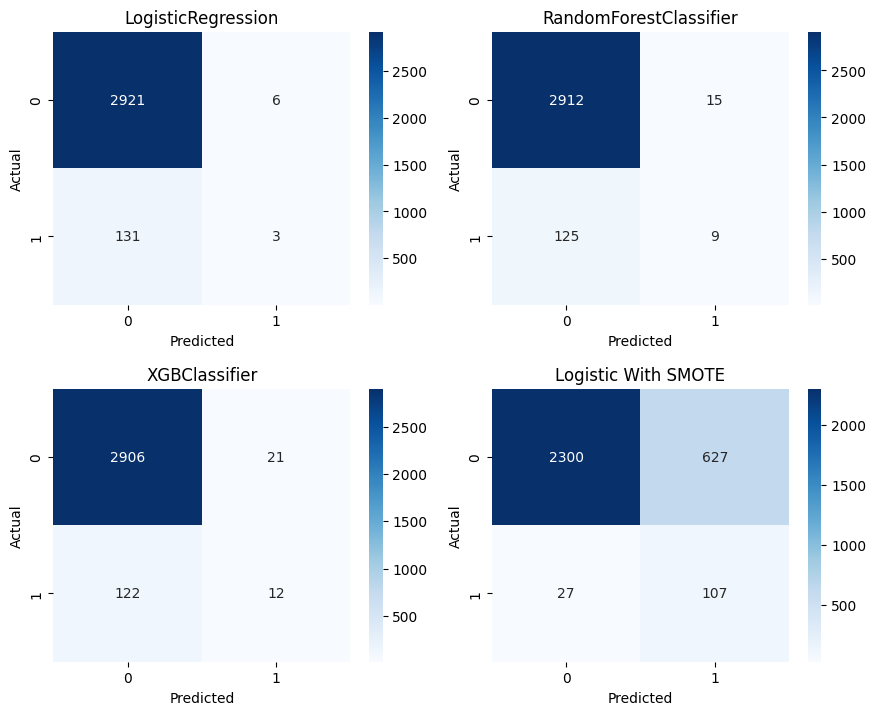

In [95]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(9,7))
for ax,model_name in zip(axes.ravel(),models_to_plot):
    confusion_mat=confusion_mats[model_name]
    sns.heatmap(confusion_mat,annot=True,fmt='d',cmap='Blues',ax=ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.subplots_adjust(left=0,right=0.9, top=0.9 ,bottom=0)
plt.show()





In [96]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.metrics import PredictionErrorDisplay

In [97]:
#Retrain and Save Model
x_train=train_inputs[numerical_cols+encoded_cols]
y_train=train_df[target_col]


In [98]:
preds=lr_with_smote.predict(x_test)

In [99]:
preds

array([0, 1, 0, ..., 0, 0, 0], shape=(10203,))

In [100]:
sub_df=preds

In [101]:
pd.DataFrame(sub_df).to_csv("submission.csv",index=None)

In [102]:
sub_df=pd.read_csv("submission.csv")

In [103]:
sub_df.head()

,0
0,0
1,1
2,0
3,1
4,0


In [104]:
#Making predictions for single input
sub_df['stroke']=preds

In [105]:
sub_df

,0,stroke
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
10198,0,0
10199,0,0
10200,0,0
10201,0,0


In [106]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [107]:
single_input={
    'gender':'Male',
    'age':33,
    'hypertension':0,
    'heart_disease':0,
    'ever_married':'Yes',
    'work_type':'Private',
    'Residence_type':'Urban',
    'avg_glucose_level':79.53,
    'bmi':31.10,
    'smoking_status':'formerly smoked'
}

In [108]:
input_df=pd.DataFrame([single_input])


In [110]:
input_df[encoded_cols]=preprocessor.transform(input_df)

In [111]:
x=input_df[numerical_cols+encoded_cols]

In [112]:
lr_with_smote.predict(x)

array([0])

In [113]:
import joblib

In [114]:
model={
    'encoded_cols':encoded_cols,
    'numeric_cols':numerical_cols,
    'preprocessor':preprocessor,
    'model':lr_with_smote
}

In [115]:
joblib.dump(model,'model.joblib')

['model.joblib']